In [2]:
import sys
sys.path.append("../")

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

from astropy import units as u
from astropy.coordinates import TEME, ITRS, CartesianRepresentation, EarthLocation, GCRS

import engine.builder.sensors.ssn as ssn
import engine.builder.satellites.states as tles
from engine.util.astro import tle_to_orbit
from engine.util.time import DEFAULT_SCENARIO_EPOCH



In [ ]:
sat_keys = ["AEHF 1", "AEHF 2", "AEHF 3", "AEHF 4", "MUOS", "MUOS 3", "MUOS 5", "GOES 1", "GOES 5", "GOES 6", "GOES 7", "AMC 3"]

OUT = {}
for sk in sat_keys:
    orbit = tle_to_orbit(tles.TLE_LIBRARY[sk][1], tles.TLE_LIBRARY[sk][2], DEFAULT_SCENARIO_EPOCH)
    X = orbit.to_ephem()
    
    lats = []
    lons = []
    
    for i, pos in enumerate(X.rv()[0]):
        t = X.epochs[i]
        teme = TEME(CartesianRepresentation(pos, unit=u.km), obstime=t)
        itrs = teme.transform_to(ITRS(obstime=t))  # Earth-fixed frame
        loc = EarthLocation.from_geocentric(itrs.x, itrs.y, itrs.z)
        lats.append(loc.lat.deg)
        lons.append(loc.lon.deg)
    OUT[sk]=[lats, lons]


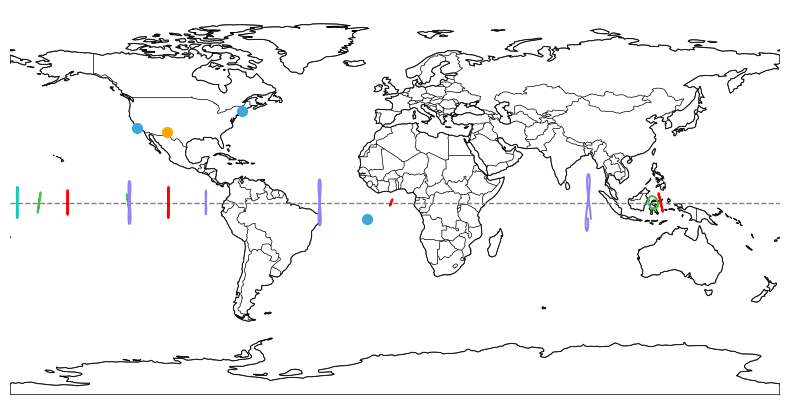

In [20]:
colors = ['red', 'red', 'red', 'red', '#43BF4D', '#43BF4D', '#43BF4D', '#9881F3', '#9881F3', '#9881F3', '#9881F3', '#13C9BA']

fig = plt.figure(figsize=(10, 5))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, facecolor='white', edgecolor='black')
ax.add_feature(cfeature.OCEAN, facecolor='white')
ax.add_feature(cfeature.BORDERS, edgecolor='black', linewidth=0.5)
ax.add_feature(cfeature.COASTLINE, edgecolor='black', linewidth=0.5)

ax.scatter(ssn.mhr().lla[1], ssn.mhr().lla[0], color='#3FA6DA', s=50, transform=ccrs.PlateCarree(), zorder=5, label='Millstone')
ax.scatter(ssn.ascension().lla[1], ssn.ascension().lla[0], color='#3FA6DA', s=50, transform=ccrs.PlateCarree(), zorder=5, label='Ascension')
ax.scatter(ssn.socorro().lla[1], ssn.socorro().lla[0], color='orange', s=50, transform=ccrs.PlateCarree(), zorder=5, label='Socorro')
ax.scatter(ssn.vandenberg().lla[1], ssn.vandenberg().lla[0], color='#3FA6DA', s=50, transform=ccrs.PlateCarree(), zorder=5, label='Vandenberg')

# Set map to global and turn off axes
equator_lons = [-180, 180]
equator_lats = [0, 0]
ax.plot(equator_lons, equator_lats, transform=ccrs.PlateCarree(), color='gray', linestyle='--', linewidth=1, label='Equator')
#colors = plt.cm.tab10.colors  # 10 distinct colors
for i, (sat_name, (lats, lons)) in enumerate(OUT.items()):
    color = colors[i % len(colors)]
    ax.plot(lons, lats, transform=ccrs.PlateCarree(), label=sat_name, linewidth=1.5, color=color)



ax.set_global()
ax.axis('off')

plt.show()
